In [1]:
import numpy as np
import scipy as sc
from scipy import ndimage
from skimage import filters
from matplotlib import pyplot as plt
# import seaborn as sns
from PIL import Image
# sns.set(context='poster')
%matplotlib inline

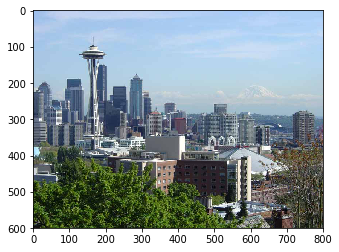

In [2]:
image = Image.open('../hw1_data/Seattle.jpg')
image = np.asarray(image)
plt.imshow(image)

Gaussian filter = $$ G(\mathbf{x}; \sigma^2) = \frac{1}{2 \pi \sigma^2} \exp{-\frac{\mathbf{x}^T \mathbf{x}}{2 \sigma^2}}$$

In [3]:
sigma = 2
filter_size = 2 * int(4 * sigma + 0.5) + 1
gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
for i in range(filter_size):
    for j in range(filter_size):
        x = i - filter_size // 2
        y = j - filter_size // 2
        gaussian_filter[i, j] = 1 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2)/(2 * sigma ** 2))
print(gaussian_filter.sum())

0.999965


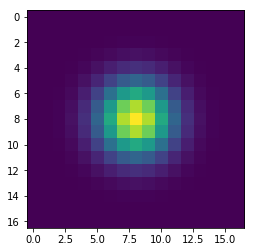

In [4]:
plt.imshow(gaussian_filter)

In [5]:
delta = np.zeros((filter_size, filter_size), dtype=np.float32)
delta[filter_size // 2, filter_size // 2] = 1
gaussian_filter_skimage = filters.gaussian(delta, sigma=sigma)
sobel_filter_skimage = filters.sobel(delta)
print(gaussian_filter_skimage.sum())
print(sobel_filter_skimage.sum())

1.0
2.41421356237


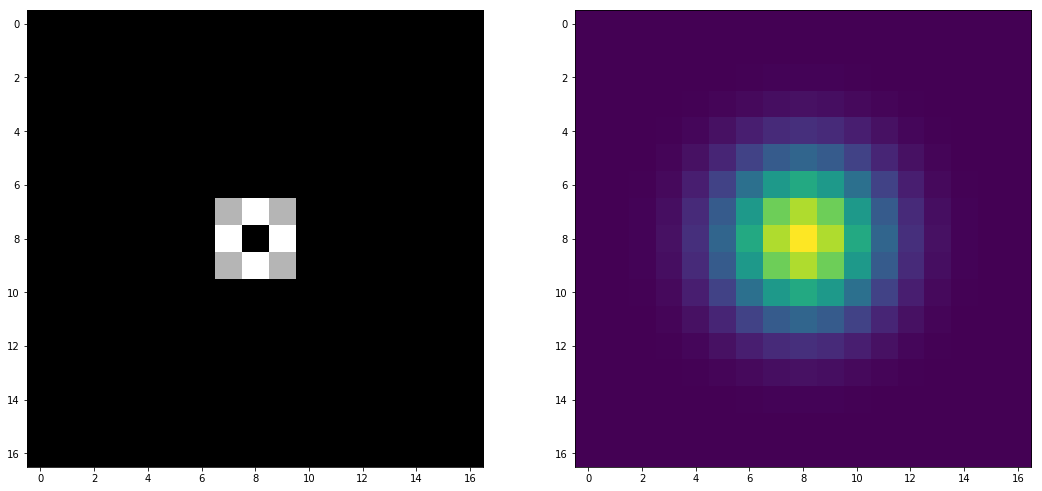

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
ax1.imshow(sobel_filter_skimage, cmap='gray')
ax2.imshow(gaussian_filter_skimage)
plt.show()

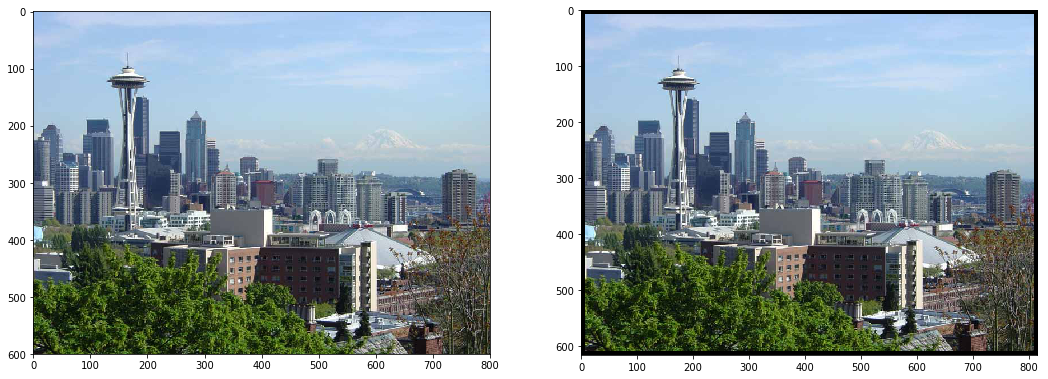

In [7]:
im_padded = np.pad(image, pad_width=((filter_size // 2, filter_size // 2), (filter_size // 2, filter_size // 2), (0, 0)), mode='constant', constant_values=0).astype(np.float32)
fig, (ax, ax_padded) = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
ax.imshow(image)
ax_padded.imshow(im_padded.astype(np.uint8))
plt.show()

In [20]:
im_filtered = np.zeros_like(image, dtype=np.float32)
for c in range(3):
    im_filtered[:, :, c] = sc.ndimage.convolve(image[:, :, c], gaussian_filter, mode='constant', cval=0)  # convolve applies zero-padding itself

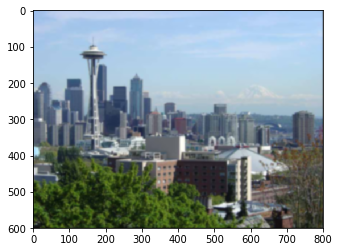

In [10]:
plt.imshow(np.clip(im_filtered, 0, 255).astype(np.uint8))

In [17]:
im_filtered_skimage = filters.gaussian(image, sigma=sigma, mode='constant', cval=0.0, multichannel=True, preserve_range=True)

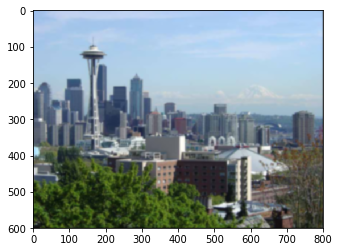

In [18]:
plt.imshow(np.clip(im_filtered_skimage, 0, 255).astype(np.uint8))